In [1]:
import pandas as pd

df = pd.read_csv('penal_df.csv')
df.head()

,org_idradactual,exp_cuij,org_idintpri,org_cod_pri,org_descorta_pri,org_descr_Pri,org_idintseg,est_id,est_descr,exp_anio,...,den_v_domestica,den_v_genero,den_zon_id,den_zona,filter_.,org_destino_act,PrimarioDen_id,PrimarioDen_id_oju,PrimarioExp_id,PrimarioExp_oju
0,72,01-00042685-3,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,1,ASIGNADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1
1,72,01-00039012-3,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,14,ARCHIVADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1
2,72,01-00035028-8,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,1,ASIGNADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1
3,72,01-00036824-1,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,14,ARCHIVADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1
4,72,01-00034124-6,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,unknown,14,ARCHIVADO,2016,...,NaN,NaN,unknown,unknown,1,unknown,1,1,1,1


In [2]:
df.shape

(37136, 59)

In [3]:
df.columns

Index(['org_idradactual', 'exp_cuij', 'org_idintpri', 'org_cod_pri',
       'org_descorta_pri', 'org_descr_Pri', 'org_idintseg', 'est_id',
       'est_descr', 'exp_anio', 'exp_cuerpos', 'exp_fojas', 'exp_detenidos',
       'exp_id', 'exp_sufijo', 'exp_fechecho', 'exp_fecinidem', 'exp_fecini',
       'exp_fecreg', 'exp_fecsor', 'exp_fecelev', 'exp_letra', 'oju_id',
       'oju_descr', 'exp_ultmov', 'exp_ultmovf', 'den_id', 'den_cod_casoMPF',
       'Tipo_ingreso_MPF', 'org_cod', 'org_descr', 'org_descorta', 'org_den',
       'org_descorta_Den', 'org_descr_Den', 'den_flagrante', 'Comuna',
       'den_barrio', 'den_calle_id', 'den_cod_postal', 'den_fec_hecho',
       'den_fec_ingreso_MPF', 'den_fec_ini_comi', 'den_hora_hecho',
       'den_latitud', 'den_longitud', 'den_tipo_den', 'den_loc_id',
       'den_sin_lugar_hecho', 'den_v_domestica', 'den_v_genero', 'den_zon_id',
       'den_zona', 'filter_.', 'org_destino_act', 'PrimarioDen_id',
       'PrimarioDen_id_oju', 'PrimarioExp_id', 'Pri

In [4]:
df.oju_descr.value_counts().head(20)

149 BIS - AMENAZAS                                                                                                        6131
149 BIS  - AMENAZAS - CP (P/ L 2303)                                                                                      5108
183 - DAÑOS                                                                                                               3241
128 1 PARR - DELITOS ATINENTES A LA PORNOGRAFIA (PRODUCIR/PUBLICAR IMAGENES PORNOGR. C MENORES 18)                        2800
89  - LESIONES LEVES                                                                                                      1989
128 1 PARR - DELITOS ATINENTES A LA PORNOGRAFIA (PRODUCIR/PUBLICAR IMAGENES PORNOGR. C MENORES 18) CP (P/ L 2303)         1886
239  - RESISTENCIA O DESOBEDIENCIA A LA AUTORIDAD                                                                         1554
5 C - COMERCIO DE ESTUPEFACIENTES O CUALQUIER MATERIA PRIMA PARA SU PRODUCCIÓN /TENENCIA CON FINES DE COMERCIAL

**A continuación, se agrupan los tipos de delitos en categorías**

In [5]:
categoria_delitos = []


for i in df.oju_descr:
    
    if '149 BIS' in i:
        categoria_delitos.append('Amenazas')
    elif '183' in i:
        categoria_delitos.append('Daños')
    elif '128 1' in i:
        categoria_delitos.append('Pornografia infantil')
    elif '89' in i:
        categoria_delitos.append('Lesiones leves')
    elif '239' in i:
        categoria_delitos.append('Resistencia a la autoridad')
    elif '5 C' in i:
        categoria_delitos.append('Comercio de estupefacientes')
    elif '14 1' in i:
        categoria_delitos.append('Tenencia de estupefacientes')
    elif '92' in i:
        categoria_delitos.append('Lesiones graves')
    elif '292 1' in i or '296' in i or '292 2°PARR' in i:
         categoria_delitos.append('Falsificacion DNI')
    elif 'INCUMPLIMIENTO DE LOS DEBERES DE ASISTENCIA FAMILIAR' in i or '1 - LN 13.944 ' in i:
        categoria_delitos.append('Incumplimiento asistencia familiar')
    elif '181 INC. 1'in i:
         categoria_delitos.append('Usurpacion')
    elif 'PRESUNTA COMISION DELITO' in i:
        categoria_delitos.append('Presunta comision delito')
    elif '301BIS' in i:
         categoria_delitos.append('Apuestas ilegales')
    elif '94  -' in i:
         categoria_delitos.append('Lesiones culposas')
    elif '296  -' in i:
         categoria_delitos.append('Uso de documento falso')     
    elif '1 1er párr' in i:
         categoria_delitos.append('Impedimento de contacto de menor con padre no conviviente')
    elif '237  - ' in i:
        categoria_delitos.append('Atentado contra la autoridad')    
    elif '150' in i:
        categoria_delitos.append('Violacion de domicilio')     
    elif '189 BIS' in i:
         categoria_delitos.append('Posesion de arma de fuego')     
    
    else:
        categoria_delitos.append('otros')
        
        
    

In [6]:
def join_categoria(df):
    
    df_cat_delitos = pd.DataFrame(categoria_delitos, columns = ['Descripcion_delitos'])
    df_nuevo = df.join(df_cat_delitos, how = 'right')
    
    return df_nuevo

df = join_categoria(df)

In [7]:
df_juzgados_delitos = df[['org_descorta_pri', 'Descripcion_delitos']]

def agrupando_datos(df, juzgado, nombre_columna):

    df= df_juzgados_delitos[df_juzgados_delitos.org_descorta_pri == juzgado]
    df = df.groupby('Descripcion_delitos').count().reset_index()
    df.rename(columns = {'org_descorta_pri' : nombre_columna}, inplace = True)
    return df

In [8]:
juz1 = agrupando_datos(df, 'JUZGADO N°1', 'Juzgado_1')
juz2 = agrupando_datos(df, 'JUZGADO N°2', 'Juzgado_2')
juz3 = agrupando_datos(df, 'JUZGADO N°3', 'Juzgado_3')
juz4 = agrupando_datos(df, 'JUZGADO N°4', 'Juzgado_4')
juz5 = agrupando_datos(df, 'JUZGADO N°5', 'Juzgado_5')
juz6 = agrupando_datos(df, 'JUZGADO N°6', 'Juzgado_6')
juz7 = agrupando_datos(df, 'JUZGADO N°7', 'Juzgado_7')
juz8 = agrupando_datos(df, 'JUZGADO N°8', 'Juzgado_8')
juz9 = agrupando_datos(df, 'JUZGADO N°9', 'Juzgado_9')
juz10 = agrupando_datos(df, 'JUZGADO N°10', 'Juzgado_10')
juz11 = agrupando_datos(df, 'JUZGADO N°11', 'Juzgado_11')
juz12 = agrupando_datos(df, 'JUZGADO N°12', 'Juzgado_12')
juz13 = agrupando_datos(df, 'JUZGADO N°13', 'Juzgado_13')
juz14 = agrupando_datos(df, 'JUZGADO N°14', 'Juzgado_14')
juz15 = agrupando_datos(df, 'JUZGADO N°15', 'Juzgado_15')
juz16 = agrupando_datos(df, 'JUZGADO N°16', 'Juzgado_16')
juz17 = agrupando_datos(df, 'JUZGADO N°17', 'Juzgado_17')
juz18 = agrupando_datos(df, 'JUZGADO N°18', 'Juzgado_18')
juz19 = agrupando_datos(df, 'JUZGADO N°19', 'Juzgado_19')
juz20 = agrupando_datos(df, 'JUZGADO N°20', 'Juzgado_20')
juz21 = agrupando_datos(df, 'JUZGADO N°21', 'Juzgado_21')
juz22 = agrupando_datos(df, 'JUZGADO N°22', 'Juzgado_22')
juz23 = agrupando_datos(df, 'JUZGADO N°23', 'Juzgado_23')
juz24 = agrupando_datos(df, 'JUZGADO N°24', 'Juzgado_24')
juz25 = agrupando_datos(df, 'JUZGADO N°25', 'Juzgado_25')
juz26 = agrupando_datos(df, 'JUZGADO N°26', 'Juzgado_26')
juz27 = agrupando_datos(df, 'JUZGADO N°27', 'Juzgado_27')
juz28 = agrupando_datos(df, 'JUZGADO N°28', 'Juzgado_28')
juz29 = agrupando_datos(df, 'JUZGADO N°29', 'Juzgado_29')
juz30 = agrupando_datos(df, 'JUZGADO N°30', 'Juzgado_30')
juz31 = agrupando_datos(df, 'JUZGADO N°31', 'Juzgado_31')



In [9]:
from functools import reduce

dataframes = [juz1,juz2,juz3,juz4,juz5,juz6,juz7,juz8,juz9,juz10,juz11,juz12,juz13,juz14,juz15,juz16,juz17,juz18,juz19,juz20,juz21,juz22,juz23,juz24,juz25
              ,juz26,juz27,juz28,juz29,
              juz30,juz31]

df_agrupado = reduce(lambda  left,right: pd.merge(left,right,on=['Descripcion_delitos'],
                                            how='outer'), dataframes)
df_agrupado

,Descripcion_delitos,Juzgado_1,Juzgado_2,Juzgado_3,Juzgado_4,Juzgado_5,Juzgado_6,Juzgado_7,Juzgado_8,Juzgado_9,...,Juzgado_22,Juzgado_23,Juzgado_24,Juzgado_25,Juzgado_26,Juzgado_27,Juzgado_28,Juzgado_29,Juzgado_30,Juzgado_31
0,Amenazas,369,327,528,339,353,377,363,387,362,...,389,349,378,359,362,377,345,358,332,315
1,Apuestas ilegales,29,8,12,4,26,9,8,2,1,...,37,8,11,21,5,8,13,2,2,5
2,Atentado contra la autoridad,9,8,19,14,6,10,6,8,18,...,7,18,9,10,4,25,15,16,8,12
3,Comercio de estupefacientes,29,24,17,34,11,52,23,38,44,...,28,44,24,27,45,21,25,34,53,22
4,Daños,92,75,167,110,117,120,104,99,111,...,95,107,128,98,66,122,127,103,118,106
5,Falsificacion DNI,7,16,18,13,7,6,17,13,11,...,21,8,4,13,14,8,5,12,8,22
6,Impedimento de contacto de menor con padre no ...,5,6,9,12,6,9,6,10,20,...,14,16,23,19,6,9,14,9,12,23
7,Incumplimiento asistencia familiar,36,23,37,30,31,20,26,42,21,...,27,22,32,30,42,37,32,28,37,41
8,Lesiones culposas,6,6,11,14,5,31,10,8,17,...,7,22,17,14,6,18,18,16,14,15
9,Lesiones graves,38,32,30,30,18,29,27,9,29,...,19,108,30,29,15,35,18,35,37,20


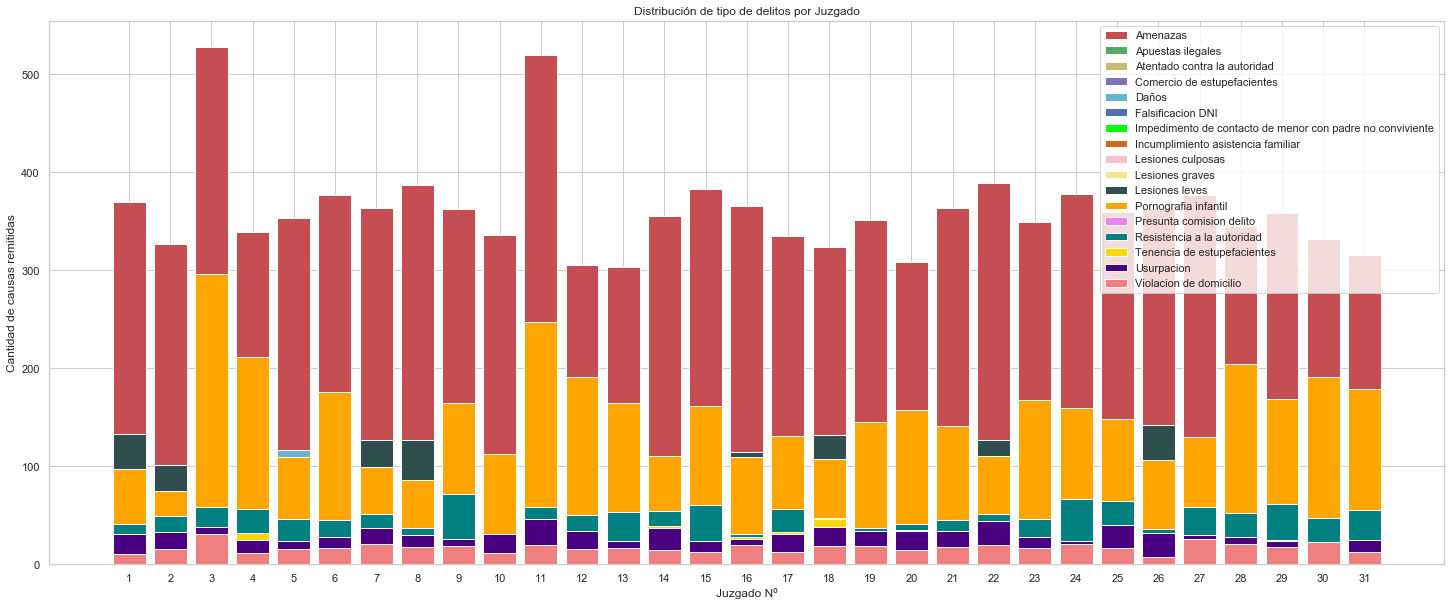

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,32,1)

fig, ax = plt.subplots(figsize=(25, 10))
 
labels = df_agrupado.loc[:16,'Descripcion_delitos'].values

graph0 = plt.bar(x,df_agrupado.iloc[0,1:].values, color = 'r', width = 0.8)
graph1 = plt.bar(x,df_agrupado.iloc[1,1:].values, color = 'g', width = 0.8,)
graph2 = plt.bar(x,df_agrupado.iloc[2,1:].values, color = 'y', width = 0.8)
graph3 = plt.bar(x,df_agrupado.iloc[3,1:].values, color = 'm', width = 0.8)
graph4 = plt.bar(x,df_agrupado.iloc[4,1:].values, color = 'c', width = 0.8)
graph5 = plt.bar(x,df_agrupado.iloc[5,1:].values, color = 'b', width = 0.8)
graph6 = plt.bar(x,df_agrupado.iloc[6,1:].values, color = 'lime', width = 0.8)
graph7 = plt.bar(x,df_agrupado.iloc[7,1:].values, color = 'chocolate', width = 0.8)
graph8 = plt.bar(x,df_agrupado.iloc[8,1:].values, color = 'pink', width = 0.8)
graph9 = plt.bar(x,df_agrupado.iloc[9,1:].values, color = 'khaki', width = 0.8)
graph10 = plt.bar(x,df_agrupado.iloc[10,1:].values, color = 'darkslategrey', width = 0.8)
graph11 = plt.bar(x,df_agrupado.iloc[11,1:].values, color = 'orange', width = 0.8)
graph12 = plt.bar(x,df_agrupado.iloc[12,1:].values, color = 'violet', width = 0.8)
graph13 = plt.bar(x,df_agrupado.iloc[13,1:].values, color = 'teal', width = 0.8)
graph14 = plt.bar(x,df_agrupado.iloc[14,1:].values, color = 'gold', width = 0.8)
graph15 = plt.bar(x,df_agrupado.iloc[15,1:].values, color = 'indigo', width = 0.8)
graph16 = plt.bar(x,df_agrupado.iloc[16,1:].values, color = 'lightcoral', width = 0.8)

ax.set_title('Distribución de tipo de delitos por Juzgado')
ax.set_ylabel('Cantidad de causas remitidas')
ax.set_xlabel('Juzgado Nº')
ax.set_xticks(x)
plt.legend(labels = labels)

plt.show()

In [11]:
df_agrupado.loc[18,'Descripcion_delitos'] = 'Total'
df_agrupado.loc[18,1:] = df_agrupado.sum(axis = 0)

In [12]:
df_agrupado

,Descripcion_delitos,Juzgado_1,Juzgado_2,Juzgado_3,Juzgado_4,Juzgado_5,Juzgado_6,Juzgado_7,Juzgado_8,Juzgado_9,...,Juzgado_22,Juzgado_23,Juzgado_24,Juzgado_25,Juzgado_26,Juzgado_27,Juzgado_28,Juzgado_29,Juzgado_30,Juzgado_31
0,Amenazas,369.0,327.0,528.0,339.0,353.0,377.0,363.0,387.0,362.0,...,389.0,349.0,378.0,359.0,362.0,377.0,345.0,358.0,332.0,315.0
1,Apuestas ilegales,29.0,8.0,12.0,4.0,26.0,9.0,8.0,2.0,1.0,...,37.0,8.0,11.0,21.0,5.0,8.0,13.0,2.0,2.0,5.0
2,Atentado contra la autoridad,9.0,8.0,19.0,14.0,6.0,10.0,6.0,8.0,18.0,...,7.0,18.0,9.0,10.0,4.0,25.0,15.0,16.0,8.0,12.0
3,Comercio de estupefacientes,29.0,24.0,17.0,34.0,11.0,52.0,23.0,38.0,44.0,...,28.0,44.0,24.0,27.0,45.0,21.0,25.0,34.0,53.0,22.0
4,Daños,92.0,75.0,167.0,110.0,117.0,120.0,104.0,99.0,111.0,...,95.0,107.0,128.0,98.0,66.0,122.0,127.0,103.0,118.0,106.0
5,Falsificacion DNI,7.0,16.0,18.0,13.0,7.0,6.0,17.0,13.0,11.0,...,21.0,8.0,4.0,13.0,14.0,8.0,5.0,12.0,8.0,22.0
6,Impedimento de contacto de menor con padre no ...,5.0,6.0,9.0,12.0,6.0,9.0,6.0,10.0,20.0,...,14.0,16.0,23.0,19.0,6.0,9.0,14.0,9.0,12.0,23.0
7,Incumplimiento asistencia familiar,36.0,23.0,37.0,30.0,31.0,20.0,26.0,42.0,21.0,...,27.0,22.0,32.0,30.0,42.0,37.0,32.0,28.0,37.0,41.0
8,Lesiones culposas,6.0,6.0,11.0,14.0,5.0,31.0,10.0,8.0,17.0,...,7.0,22.0,17.0,14.0,6.0,18.0,18.0,16.0,14.0,15.0
9,Lesiones graves,38.0,32.0,30.0,30.0,18.0,29.0,27.0,9.0,29.0,...,19.0,108.0,30.0,29.0,15.0,35.0,18.0,35.0,37.0,20.0


**No se observa un desbalanceo importante en la asignación de causas relacionadas con amenazas, ni tampoco en aquellas
relacionadas con la pornografía**

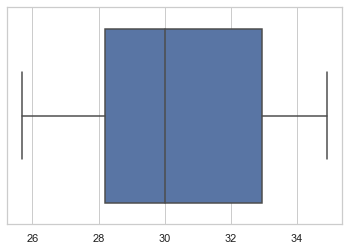

In [13]:
import seaborn as sns

amenazas = (df_agrupado.iloc[0,1:-1] / df_agrupado.iloc[18,1:-1]) * 100
pornografia = (df_agrupado.iloc[11,1:-1] / df_agrupado.iloc[18,1:-1]) * 100

sns.set(style="whitegrid")

sns.boxplot(amenazas)

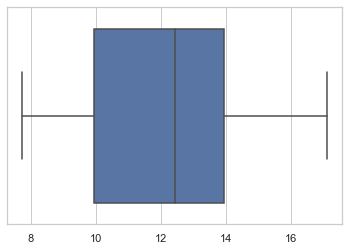

In [14]:
sns.boxplot(pornografia)